In [2]:
from splat.read_colmap import read_images_text, qvec2rotmat
from splat.scene import GaussianScene
import pycolmap
import torch 
import torch.nn as nn

reconstruction = pycolmap.Reconstruction("/Users/derek/Desktop/colmap/gerrard-hall/sparse/0")

points3d = reconstruction.points3D
images = read_images_text("/Users/derek/Desktop/colmap/gerrard-hall/sparse/images.txt")
cameras = reconstruction.cameras

all_points3d = []
all_point_colors = []
for point in points3d.values():
    # I would assume this is seeing it from multiple images
    if point.track.length() >= 5:
        all_points3d.append(point.xyz)
        all_point_colors.append(point.color / 256)
        
scene = GaussianScene(torch.Tensor(all_points3d), torch.Tensor(all_point_colors))
covariances = scene.get_3d_covariance_matrix()

/var/folders/5t/lqp_tbx57bl8lb0cbbxb2sv80000gn/T/ipykernel_65200/3272003391.py:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  scene = GaussianScene(torch.Tensor(all_points3d), torch.Tensor(all_point_colors))
/Users/derek/Desktop/personal_gaussian_splatting/splat/types.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.points = torch.tensor(
/Users/derek/Desktop/personal_gaussian_splatting/splat/types.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch

In [13]:

# project all points to 2d
from splat.utils import get_intrinsic_matrix, get_extrinsic_matrix, get_points_and_covariance

image_num = 14

fx, fy, cx, cy = cameras[1].params[:4]
intrinsic_homogeneous = get_intrinsic_matrix(fx, fy, cx, cy)
image_qvec = images[image_num].qvec
image_tvec = images[image_num].tvec
image_rotation_matrix = qvec2rotmat(image_qvec)
image_translation = torch.Tensor(image_tvec)
extrinsic_matrix = get_extrinsic_matrix(image_rotation_matrix, image_translation)

two_dim_points, covariance = get_points_and_covariance(scene.points, covariances, extrinsic_matrix, intrinsic_homogeneous)


torch.Size([22662, 4])


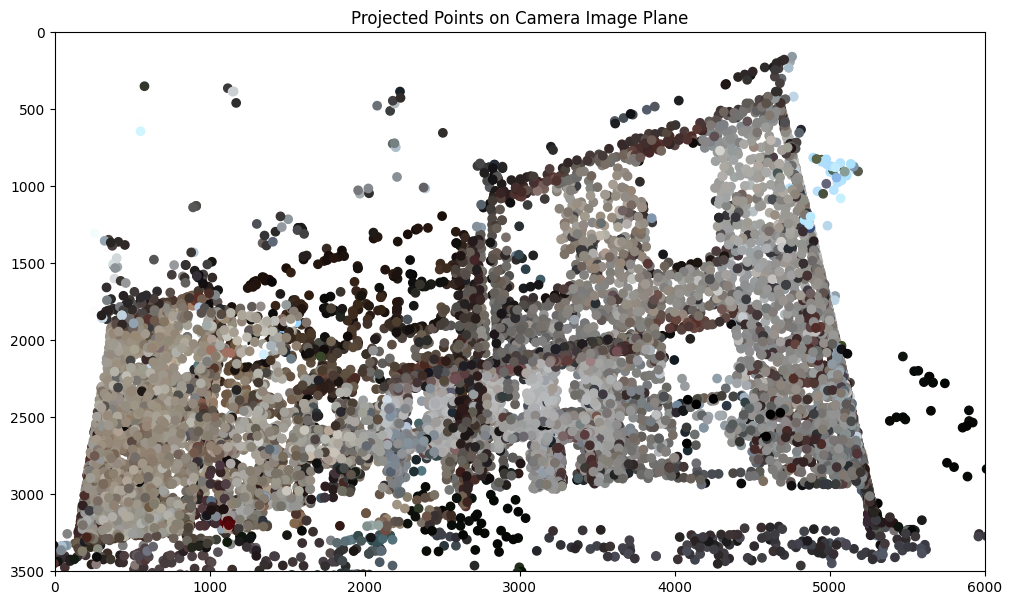

In [14]:
import numpy as np
import matplotlib.pyplot as plt
points2d = np.array(two_dim_points.cpu().detach())
colors2d = np.array(scene.colors.cpu().detach())

# Plot points
plt.figure(figsize=(12, 7))
plt.scatter(points2d[:, 0], points2d[:, 1], c=colors2d)
plt.xlim(0, 6000)
plt.ylim(0, 3500)
plt.gca().invert_yaxis()  # Invert the y-axis to match the image coordinates
plt.title('Projected Points on Camera Image Plane')
plt.show()


In [10]:
images[image_num]

Image(id=5, qvec=array([-0.206741 ,  0.0182152,  0.955409 , -0.21005  ]), tvec=array([1.18136, 1.07717, 4.19551]), camera_id=1, name='IMG_2336.JPG', xys=array([[  27.0022,   57.3597],
       [ 826.9   ,   22.4069],
       [ 821.195 ,   42.784 ],
       ...,
       [2575.34  , 3406.72  ],
       [3003.63  , 3401.34  ],
       [3003.63  , 3401.34  ]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))